In [1]:
import pandas as pd
%matplotlib inline

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

In [2]:
from pathlib import Path
csvpath = Path("../Project 2/Resources/LTC_USD.csv")
df = pd.read_csv(csvpath, parse_dates=True, index_col='Date')
df.tail()

,Currency,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
Date,,,,,
2021-07-20,LTC,107.272042,113.153208,115.042202,104.094588
2021-07-21,LTC,117.109194,107.330562,119.184707,105.153298
2021-07-22,LTC,119.913432,117.701875,122.081390,115.738590
2021-07-23,LTC,122.269072,120.707185,122.339452,117.134287
2021-07-24,LTC,124.637360,124.290013,127.480713,123.435597


<AxesSubplot:xlabel='Date'>

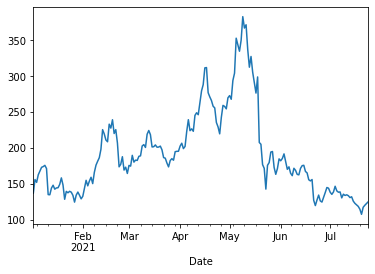

In [3]:
df["Closing Price (USD)"].plot()

<AxesSubplot:xlabel='Date'>

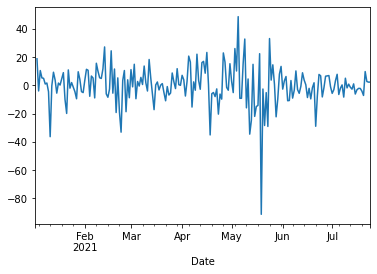

In [4]:
# Differencing the Settle price stationarizes the time series
df["Closing Price (USD)"].diff().plot()

# Autocorrelation and Partial Autocorrelation Analysis

In [5]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

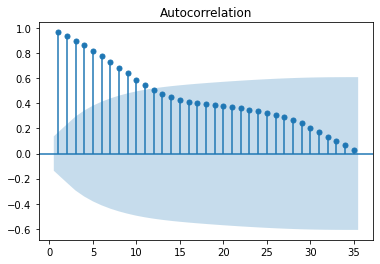

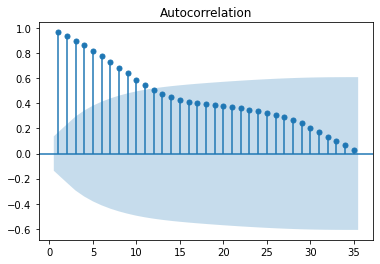

In [6]:
# Plot the autocorrelation of the Settle Prices
plot_acf(df["Closing Price (USD)"], zero=False, lags=35)

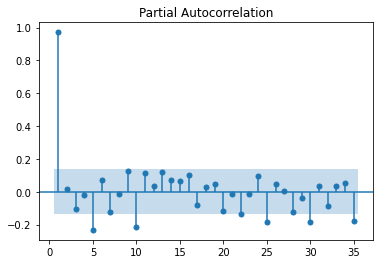

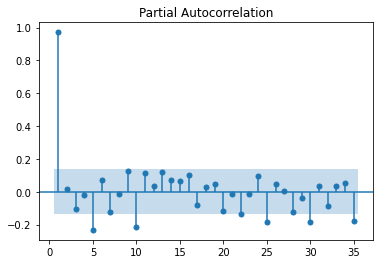

In [7]:
# Plot the partial autocorrelation of the returns
plot_pacf(df["Closing Price (USD)"], zero=False, lags=35)

# ARIMA Model

In [8]:
from statsmodels.tsa.arima_model import ARIMA

In [9]:
# Create an ARIMA model
model = ARIMA(df["Closing Price (USD)"].values, order=(1, 1, 1))

C:\Users\Jamison\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


In [10]:
# Fit the model to the data
results = model.fit()

C:\Users\Jamison\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


In [11]:
# Print the model summary
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                    D.y   No. Observations:                  203
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -819.983
Method:                       css-mle   S.D. of innovations             13.740
Date:                Tue, 27 Jul 2021   AIC                           1647.966
Time:                        19:52:52   BIC                           1661.219
Sample:                             1   HQIC                          1653.328
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0637      0.932     -0.068      0.945      -1.890       1.762
ar.L1.D.y     -0.8206      0.125     -6.567      0.000      -1.065      -0.576
ma.L1.D.y      0.7585      0.137      5.523      0.000       0.489       1.028
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.2186           +0.0000j            1.2186            0.5000
MA.1           -1.3185           +0.0000j            1.3185            0.5000
-----------------------------------------------------------------------------
"""

<AxesSubplot:title={'center':'Futures Forecast'}>

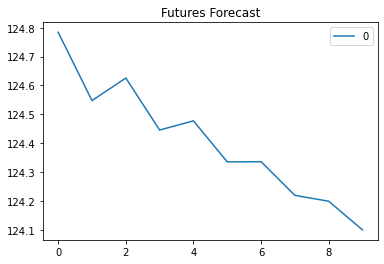

In [12]:
# Plot the Futures Price Forecast
pd.DataFrame(results.forecast(steps=10)[0]).plot(title="Futures Forecast")

# ARIMA Model using a Lag of 2

In [18]:
# Create an ARIMA Model and fit it to the data
model2 = ARIMA(df["Closing Price (USD)"].values, order=(2, 1, 1))
results2 = model2.fit()

C:\Users\Jamison\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\Jamison\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_mode

In [19]:
# print the model summary
results2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                    D.y   No. Observations:                  203
Model:                 ARIMA(2, 1, 1)   Log Likelihood                -819.182
Method:                       css-mle   S.D. of innovations             13.685
Date:                Tue, 27 Jul 2021   AIC                           1648.364
Time:                        19:53:34   BIC                           1664.930
Sample:                             1   HQIC                          1655.066
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0542      1.019     -0.053      0.958      -2.052       1.944
ar.L1.D.y     -0.6829      0.155     -4.397      0.000      -0.987      -0.378
ar.L2.D.y      0.0946      0.073      1.303      0.193      -0.048       0.237
ma.L1.D.y      0.6864      0.141      4.852      0.000       0.409       0.964
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.2484           +0.0000j            1.2484            0.5000
AR.2            8.4665           +0.0000j            8.4665            0.0000
MA.1           -1.4569           +0.0000j            1.4569            0.5000
-----------------------------------------------------------------------------
"""

<AxesSubplot:title={'center':'Futures Forecast'}>

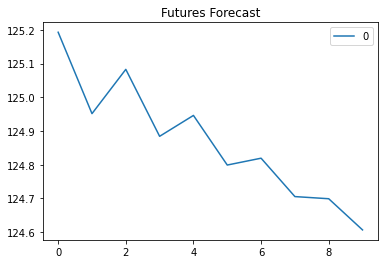

In [20]:
# Plot the Futures Price Forecast
pd.DataFrame(results2.forecast(steps=10)[0]).plot(title="Futures Forecast")